<h1>Requirements for the maximum grade of 4</h1>

<b>1. Table of the distribution of the qualitative variable in the dataset</b>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import math

file_path = 'data.csv'
column_names = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']

# read data from csv with proper column names
data = pd.read_csv(file_path, header=None, names=column_names)

# getting first column to variable
qualitative_variable  = data['sex']

male_count, female_count, infant_count = 0, 0, 0

for i in qualitative_variable: 
    if i == 'M':
        male_count += 1
    elif i =='F':
        female_count += 1
    else:
        infant_count += 1

# sum of all sexes
sum_of_sexes = data['sex'].count()

# getting each of sexes in %
male_part, female_part , infant_part = male_count/sum_of_sexes*100, female_count/sum_of_sexes*100, infant_count/sum_of_sexes*100

qualitative_variable_table = pd.DataFrame({
    "count": [male_count, infant_count, female_count],
    "%": [male_part, infant_part, female_part],
})

qualitative_variable_table.style \
  .format(precision=2, decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["Male", "Infant", "Female"], axis=0)

,COUNT,%
Male,1528,"36,58"
Infant,1342,"32,13"
Female,1307,"31,29"


<b>2. Table with summary statistics for the quantitative variables in the dataset<b>

In [24]:
def mean(numbers):
    return numbers.sum()/numbers.count()

def std(numbers, mean):
    sum = 0
    for num in numbers:
        sum += (num - mean)**2
    return math.sqrt(sum/numbers.count())

def minimum(numbers):
    min = numbers[0]
    for num in numbers(1, numbers.count):
        if num < min:
            min = num

    return min

quantitative_variables_table = pd.DataFrame(columns=['mean', 'std', 'min', '25%', '50%', '75%', 'max'], 
                                            index=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

length_described_values = data['length'].describe().values
diameter_described_values = data['diameter'].describe().values
height_described_values = data['height'].describe().values
whole_weight_described_values = data['whole weight'].describe().values
shucked_weight_described_values = data['shucked weight'].describe().values
viscera_weight_described_values = data['viscera weight'].describe().values
shell_weight_described_values = data['shell weight'].describe().values
rings_described_values = data['rings'].describe().values

quantitative_variables_table.loc['Length'] = pd.Series(
    {'mean': length_described_values[1], 'std': length_described_values[2], 'min': length_described_values[3], '25%': length_described_values[4], 
     '50%': length_described_values[5], '75%': length_described_values[6], 'max': length_described_values[7]})
quantitative_variables_table.loc['Diameter'] = pd.Series(
    {'mean': diameter_described_values[1], 'std': diameter_described_values[2], 'min': diameter_described_values[3], '25%': diameter_described_values[4], 
     '50%': diameter_described_values[5], '75%': diameter_described_values[6], 'max': diameter_described_values[7]})
quantitative_variables_table.loc['Height'] = pd.Series(
    {'mean': height_described_values[1], 'std': height_described_values[2], 'min': height_described_values[3], '25%': height_described_values[4], 
     '50%': height_described_values[5], '75%': height_described_values[6], 'max': height_described_values[7]})
quantitative_variables_table.loc['Whole weight'] = pd.Series(
    {'mean': whole_weight_described_values[1], 'std': whole_weight_described_values[2], 'min': whole_weight_described_values[3], '25%': whole_weight_described_values[4], 
     '50%': whole_weight_described_values[5], '75%': whole_weight_described_values[6], 'max': whole_weight_described_values[7]})
quantitative_variables_table.loc['Shucked weight'] = pd.Series(
    {'mean': shucked_weight_described_values[1], 'std': shucked_weight_described_values[2], 'min': shucked_weight_described_values[3], '25%': shucked_weight_described_values[4], 
     '50%': shucked_weight_described_values[5], '75%': shucked_weight_described_values[6], 'max': shucked_weight_described_values[7]})
quantitative_variables_table.loc['Viscera weight'] = pd.Series(
    {'mean': viscera_weight_described_values[1], 'std': viscera_weight_described_values[2], 'min': viscera_weight_described_values[3], '25%': viscera_weight_described_values[4], 
     '50%': viscera_weight_described_values[5], '75%': viscera_weight_described_values[6], 'max': viscera_weight_described_values[7]})
quantitative_variables_table.loc['Shell weight'] = pd.Series(
    {'mean': shell_weight_described_values[1], 'std': shell_weight_described_values[2], 'min': shell_weight_described_values[3], '25%': shell_weight_described_values[4], 
     '50%': shell_weight_described_values[5], '75%': shell_weight_described_values[6], 'max': shell_weight_described_values[7]})
quantitative_variables_table.loc['Rings'] = pd.Series(
    {'mean': rings_described_values[1], 'std': rings_described_values[2], 'min': rings_described_values[3], '25%': rings_described_values[4], 
     '50%': rings_described_values[5], '75%': rings_described_values[6], 'max': rings_described_values[7]})

quantitative_variables_table.style \
  .format(precision=2, decimal=",") \
  .format_index(str.upper, axis=1)

,MEAN,STD,MIN,25%,50%,75%,MAX
Length,"0,52","0,12","0,07","0,45","0,55","0,61","0,81"
Diameter,"0,41","0,10","0,06","0,35","0,42","0,48","0,65"
Height,"0,14","0,04","0,00","0,12","0,14","0,17","1,13"
Whole weight,"0,83","0,49","0,00","0,44","0,80","1,15","2,83"
Shucked weight,"0,36","0,22","0,00","0,19","0,34","0,50","1,49"
Viscera weight,"0,18","0,11","0,00","0,09","0,17","0,25","0,76"
Shell weight,"0,24","0,14","0,00","0,13","0,23","0,33","1,00"
Rings,"9,93","3,22","1,00","8,00","9,00","11,00","29,00"


<b>3. Bar chart of the counts of occurrences of each category for the qualitative variable in the dataset</b>

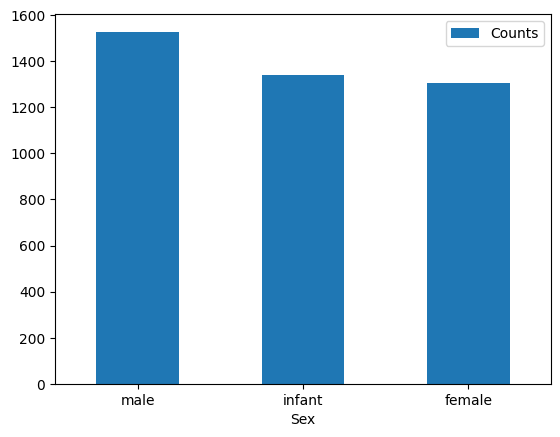

In [25]:
plot_char = pd.DataFrame({'Sex':['male', 'infant', 'female'], 'Counts':[male_count, infant_count, female_count]})
ax = plot_char.plot.bar(x='Sex', y='Counts', rot=0)

<b>4. Histogram of each quantitative variable in the dataset </b>

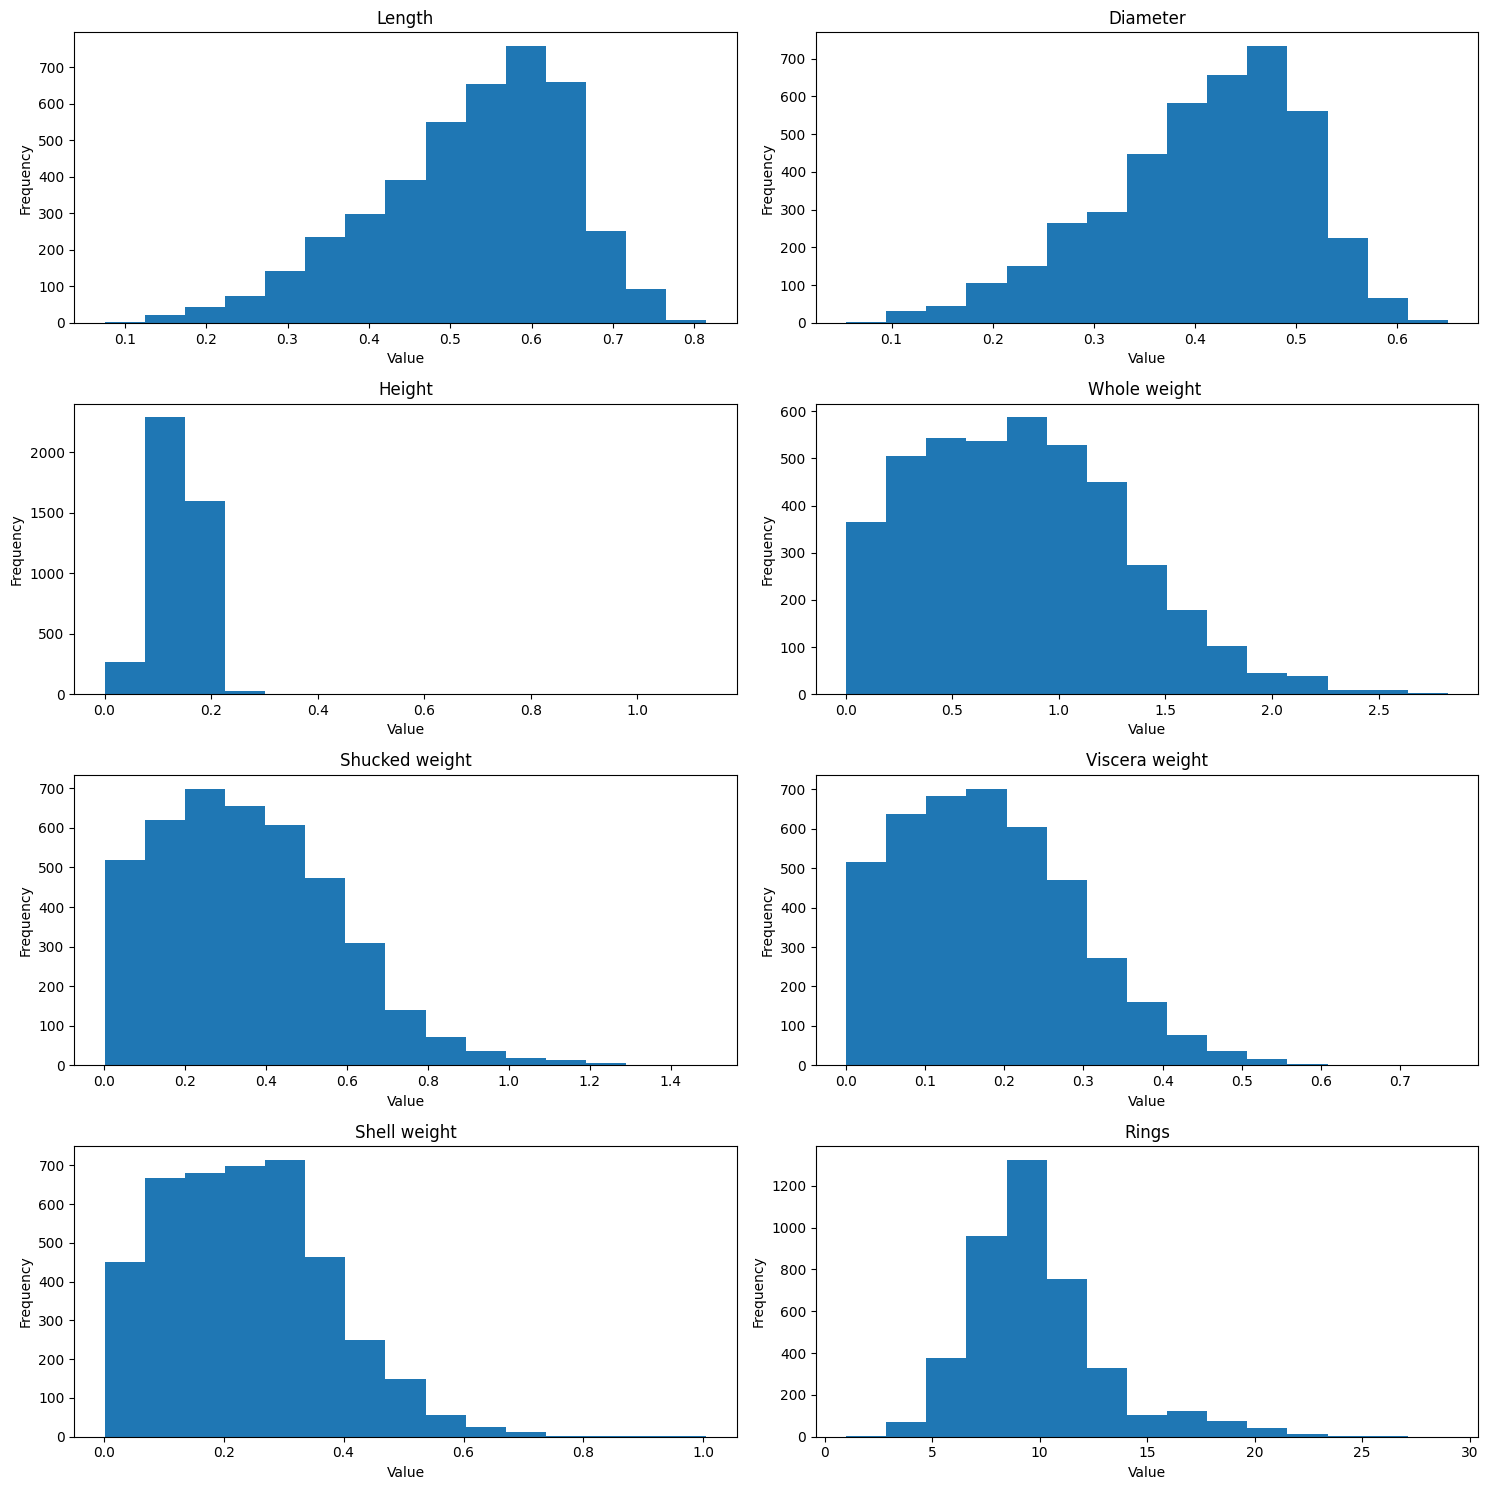

In [26]:
quantitative_variables_histogram = pd.DataFrame ({
    'Length' : [data['length']],
    'Diameter' : [data['diameter']],
    'Height' : [data['height']],
    'Whole weight ' : [data['whole weight']],
    'Shucked weight' : [data['shucked weight']],
    'Viscera weight' : [data['viscera weight']],
    'Shell weight' : [data['shell weight']],
    'Rings' : [data['rings']],
})

# histograms placed in single figure spanning 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# going through each column and create a histogram
for i, column in enumerate(quantitative_variables_histogram.columns):
    row = i//2
    col = i%2
    axes[row, col].hist(quantitative_variables_histogram[column], bins=15) 
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

<b>5. Scatter plot for reach pair of the quantitative variables in the data</b>

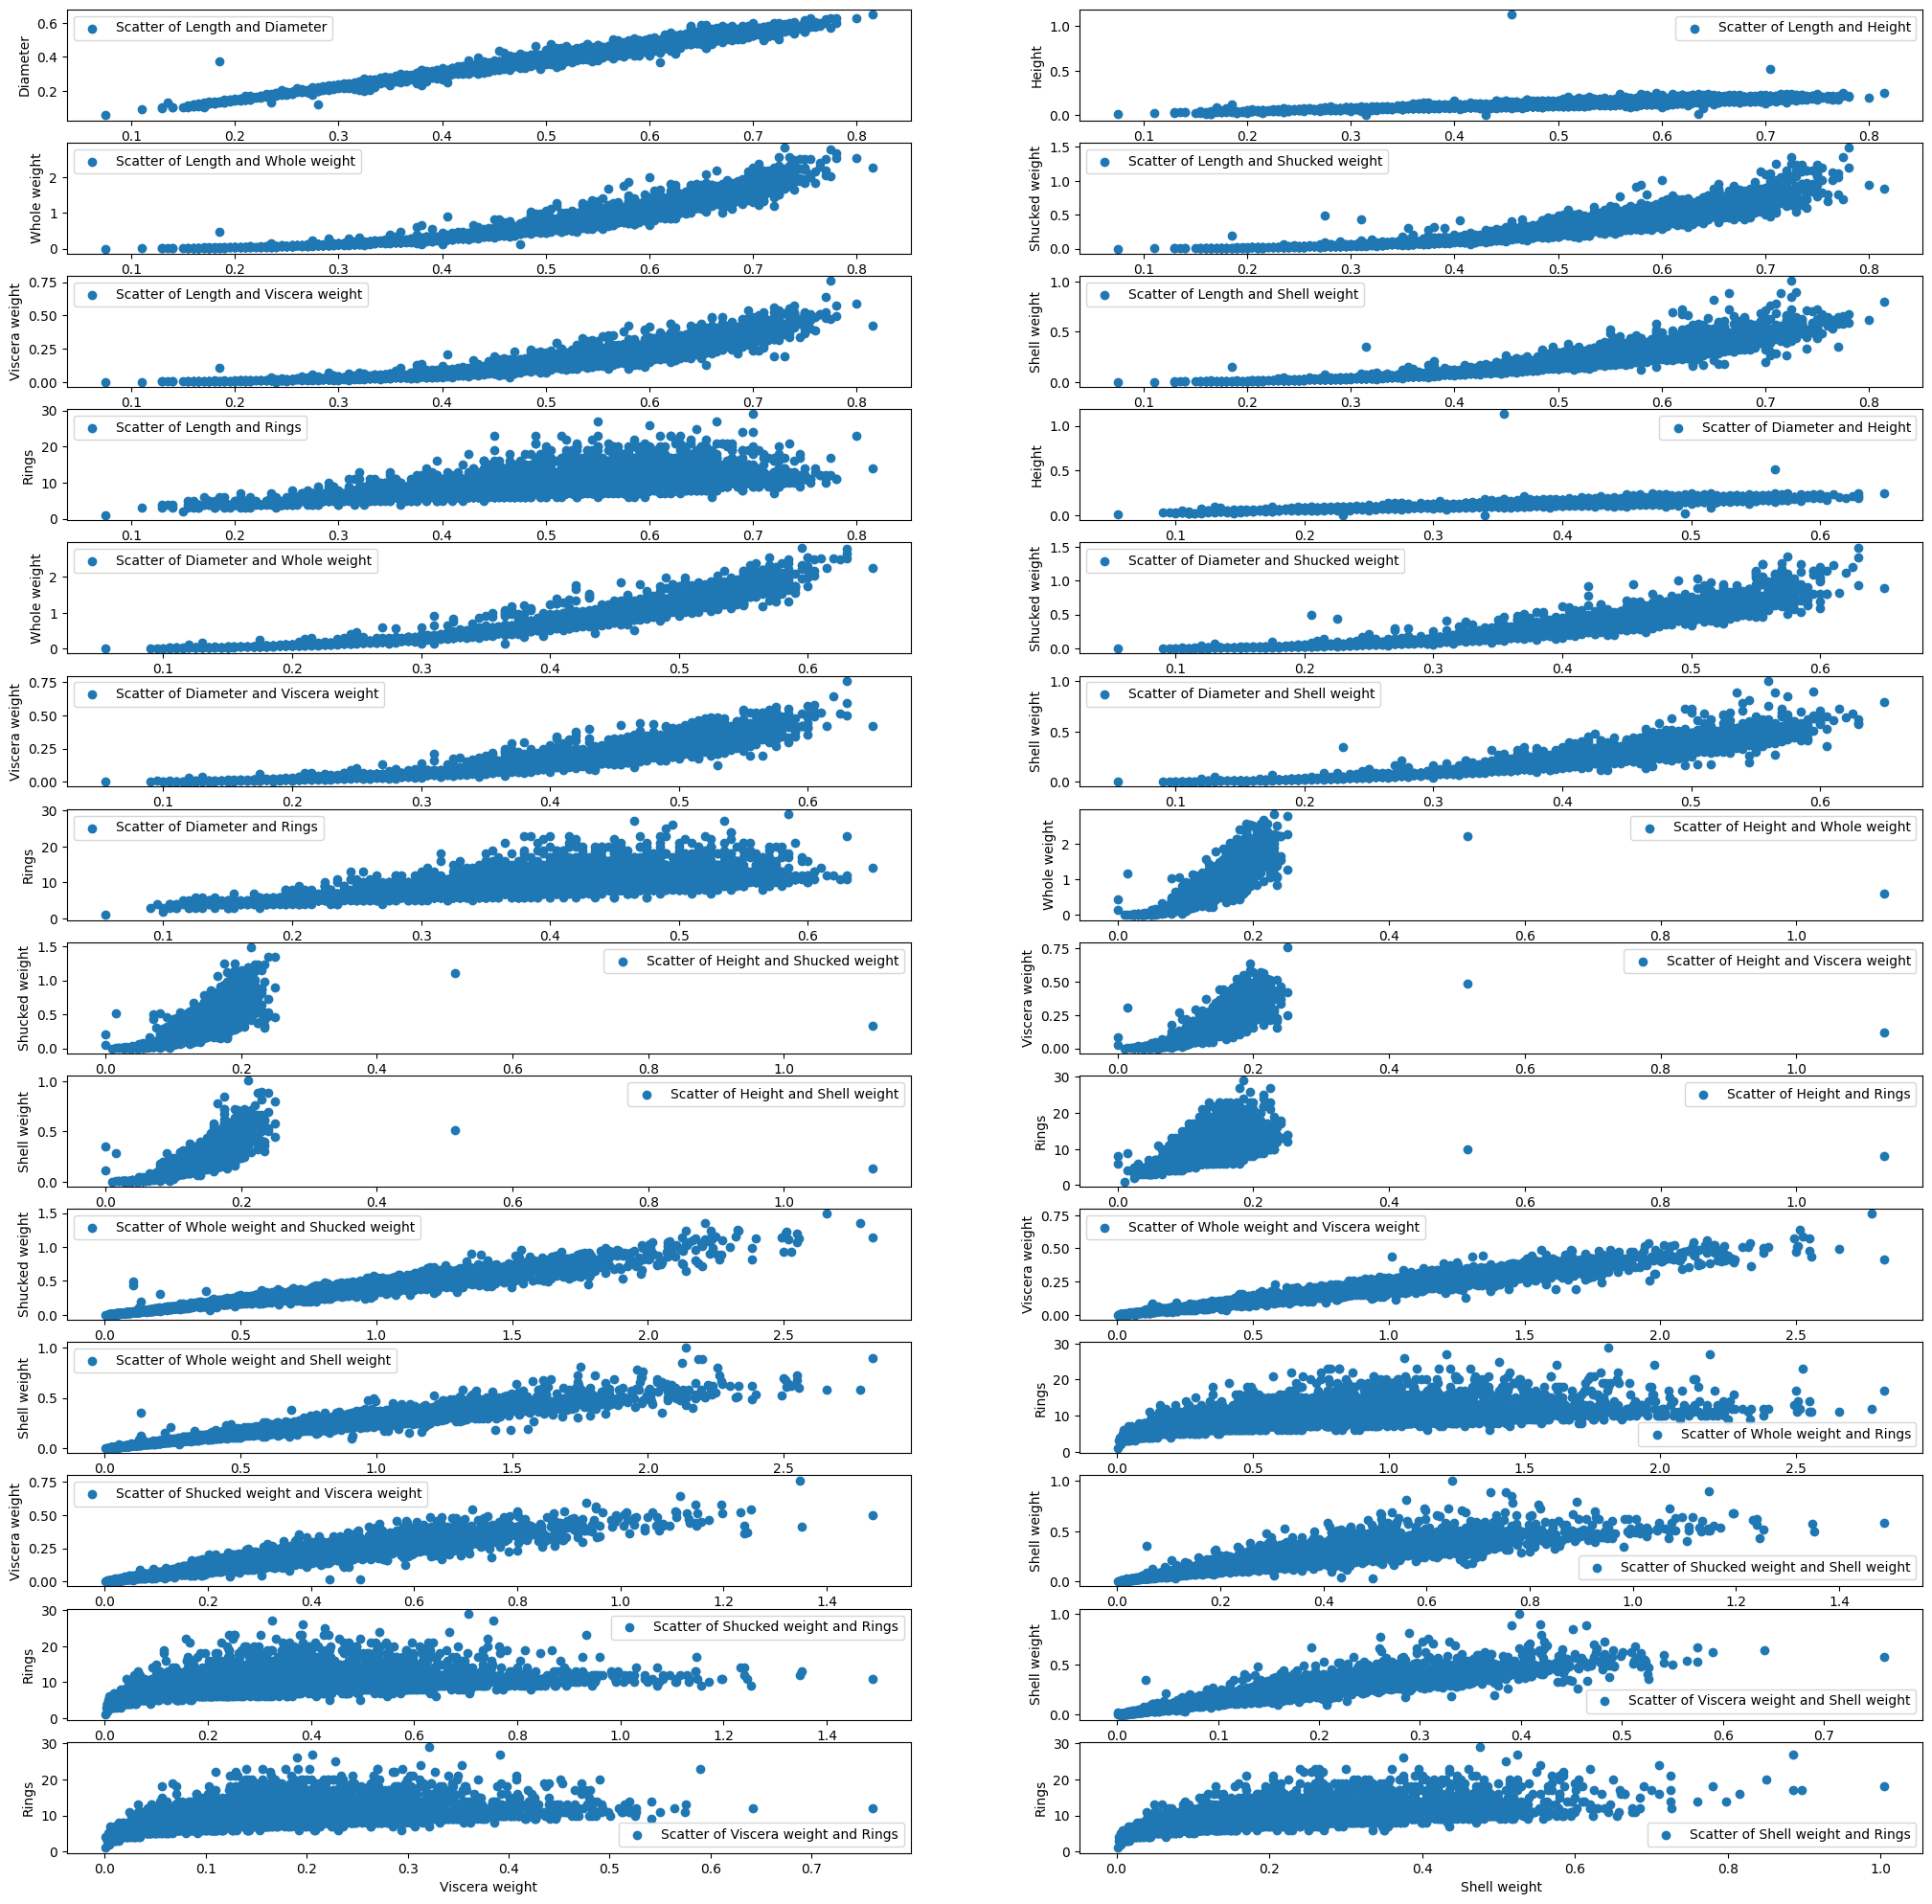

In [27]:
df = pd.DataFrame({
    'Length' : data['length'],
    'Diameter' : data['diameter'],
    'Height' : data['height'],
    'Whole weight' : data['whole weight'],
    'Shucked weight' : data['shucked weight'],
    'Viscera weight' : data['viscera weight'],
    'Shell weight' : data['shell weight'],
    'Rings' : data['rings'],
})

columns = df.columns

fig, axes = plt.subplots(14, 2, figsize=(25, 25))

axes = axes.flatten()

# to go through all 28 axes
k = 0

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        pair = (col1, col2)
        
        if not (df[col1] == df[col2]).all():
            axes[k].scatter(df[col1], df[col2], label=f'Scatter of {col1} and {col2}')
            axes[k].set_xlabel(col1)
            axes[k].set_ylabel(col2)
            axes[k].legend()
            k += 1



<b>6. Table representing a linear correlation matrix of all quantitative variables in the dataset</b>

In [29]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

<b>7. Heatmap representing a linear correlation matrix of all quantitative variables in the dataset</b>

<AxesSubplot: >

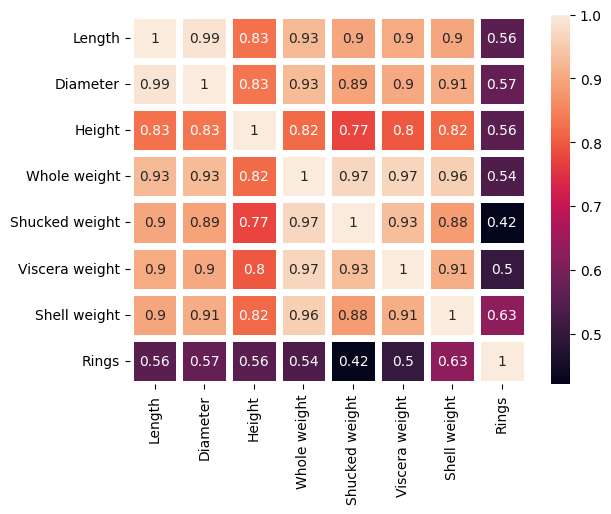

In [46]:
sbn.heatmap(correlation_matrix, annot=True, linewidth=5)

<b>8. Linear regression plot with two quantitative variables that are most strongly linearly correlated</b>

<AxesSubplot: xlabel='Diameter', ylabel='Length'>

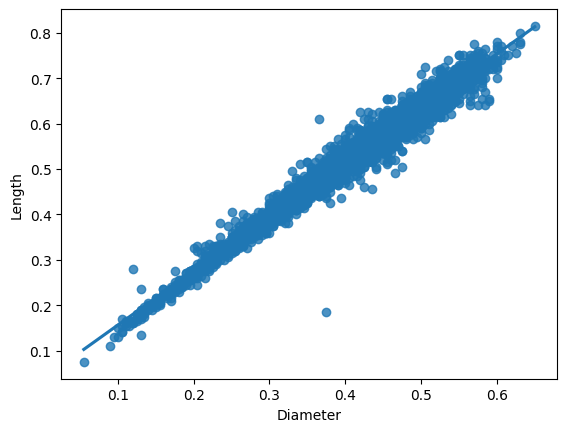

In [50]:
quan_var = pd.DataFrame({
    'Diameter' : data['diameter'],
    'Length' : data['length']
})

sbn.regplot(data=quan_var, x="Diameter", y="Length")